# Principal Component Analysis

## import library

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from sympy import Symbol,solve

## load data

In [221]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

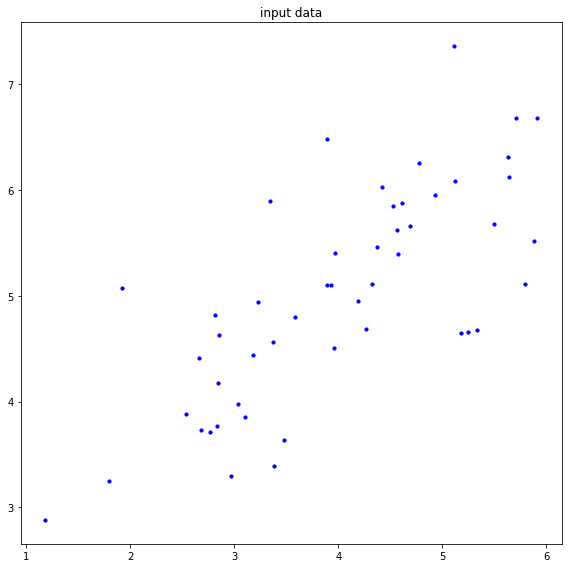

In [222]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.scatter(x, y,s = 10, c = 'b')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

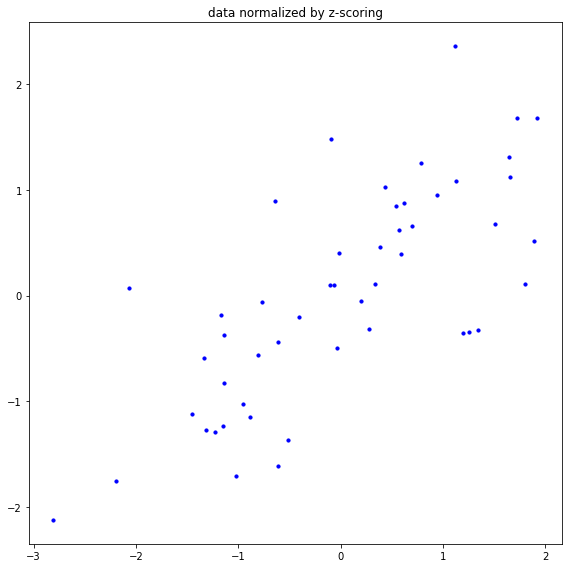

In [223]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')
sumx = 0;
sumy = 0;
for i in range(number_data):
    sumx += x[i]
    sumy += y[i]
    
avgx = sumx / number_data
avgy = sumy / number_data

z_scoring_data = np.zeros((number_data,number_feature))

for i in range(number_data):
    z_scoring_data[i][0] = x[i] - avgx
    z_scoring_data[i][1] = y[i] - avgy

temp = z_scoring_data.T

plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.tight_layout()
plt.show()

## compute covariance matrix

In [224]:
def compute_covariance(feature):
    Z = feature
    Z_T = Z.T
    Z_TmulZ = np.matmul(Z_T, Z)
    Sigma = Z_TmulZ / feature.shape[0]
    return Sigma

## compute principal directions

In [225]:
def compute_eigen(X):
    x = Symbol('x')
    y = Symbol('y')
    a = Symbol('a')
    b = Symbol('b')
    eq1 = a*x*x+b*y*y - X[0][0]
    eq2 = a*x*(1-x*x)**(1/2)+y*b*(1-y*y)**(1/2) - X[0][1]
    eq3 = a*x*(1-x*x)**(1/2)+y*b*(1-y*y)**(1/2) - X[1][0]
    eq4 = a*(1-x*x)+b*(1-y*y) - X[1][1]
    eq5 = x*y+((1-x*x)*(1-y*y))**(1/2)
    result = solve((eq1,eq2,eq3,eq4,eq5),dict = True)
    S = np.identity(n=2)
    U = X
    
    x = result[0][x]
    y = result[0][y]
    U[0][0] = x
    U[0][1] = y
    U[1][0] = sqrt(1-x**2)
    U[1][1] = sqrt(1-y**2)
    
    S[0][0] = result[0][a]
    S[1][1] = result[0][b]
    
    return S, U

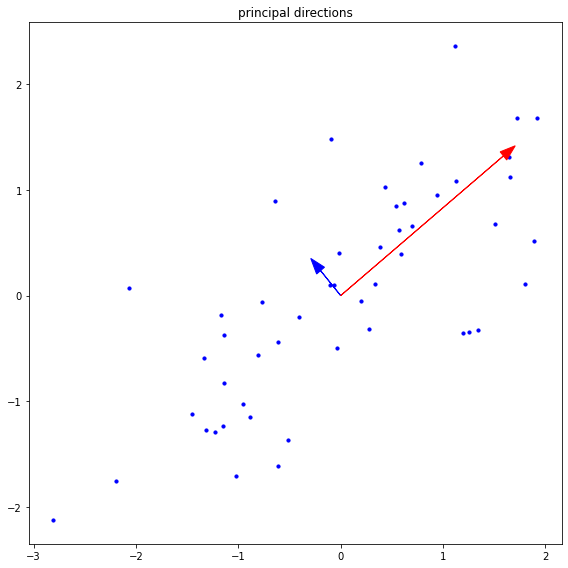

In [226]:
plt.figure(figsize=(8,8))
plt.title('principal directions')
X = compute_covariance(z_scoring_data)
S, U = compute_eigen(X)

plt.arrow(0,0,U[0][0]*S[0][0],U[1][0]*S[0][0], head_width=0.1,color = 'blue')
plt.arrow(0,0,U[0][1]*S[1][1],U[1][1]*S[1][1], head_width=0.1,color = 'red')
plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.tight_layout()
plt.show()

## first principal axis

3.0082174725698168
2.887888773667024
2.7675600747642313
2.6472313758614385
2.526902676958646
2.406573978055853
2.2862452791530603
2.1659165802502676
2.045587881347475
1.9252591824446819
1.8049304835418891
1.6846017846390964
1.5642730857363034
1.4439443868335107
1.323615687930718
1.2032869890279252
1.0829582901251325
0.9626295912223396
0.8423008923195467
0.721972193416754
0.6016434945139613
0.48131479561116847
0.36098609670837567
0.2406573978055829
0.1203286989027901
-2.6718338409013647e-15
-0.12032869890279545
-0.24065739780558823
-0.360986096708381
-0.4813147956111738
-0.6016434945139666
-0.7219721934167593
-0.8423008923195522
-0.9626295912223449
-1.0829582901251378
-1.2032869890279305
-1.3236156879307233
-1.443944386833516
-1.5642730857363087
-1.6846017846391017
-1.8049304835418944
-1.9252591824446867
-2.04558788134748
-2.1659165802502733
-2.2862452791530656
-2.406573978055858
-2.526902676958651
-2.6472313758614443
-2.7675600747642366
-2.887888773667029


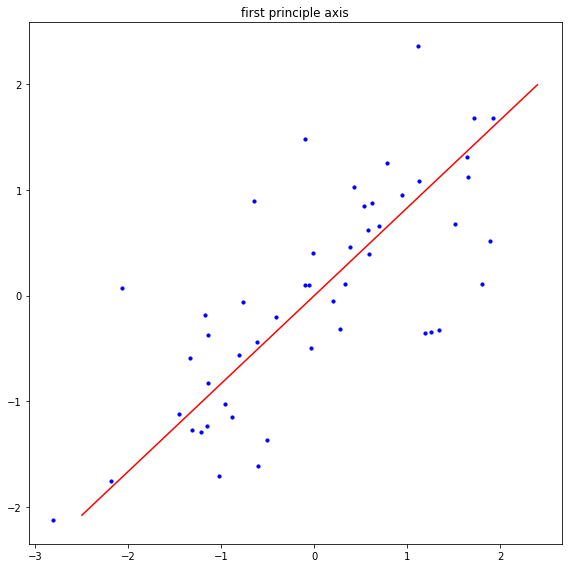

In [227]:
t = U[1][1] / U[0][1]
plt.figure(figsize=(8,8))

x = np.arange(-2.5,2.5,0.1)
f1 = np.zeros(len(x))
for i in range(len(x)):
    f1[i]=t * x[i]
    print(f[i])
    
plt.title('first principle axis')
plt.plot(x, f1, '-', color = 'red')
plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.tight_layout()
plt.show()

## second principal axis

3.0082174725698168
2.887888773667024
2.7675600747642313
2.6472313758614385
2.526902676958646
2.406573978055853
2.2862452791530603
2.1659165802502676
2.045587881347475
1.9252591824446819
1.8049304835418891
1.6846017846390964
1.5642730857363034
1.4439443868335107
1.323615687930718
1.2032869890279252
1.0829582901251325
0.9626295912223396
0.8423008923195467
0.721972193416754
0.6016434945139613
0.48131479561116847
0.36098609670837567
0.2406573978055829
0.1203286989027901
-2.6718338409013647e-15
-0.12032869890279545
-0.24065739780558823
-0.360986096708381
-0.4813147956111738
-0.6016434945139666
-0.7219721934167593
-0.8423008923195522
-0.9626295912223449
-1.0829582901251378
-1.2032869890279305
-1.3236156879307233
-1.443944386833516
-1.5642730857363087
-1.6846017846391017
-1.8049304835418944
-1.9252591824446867
-2.04558788134748
-2.1659165802502733
-2.2862452791530656
-2.406573978055858
-2.526902676958651
-2.6472313758614443
-2.7675600747642366
-2.887888773667029


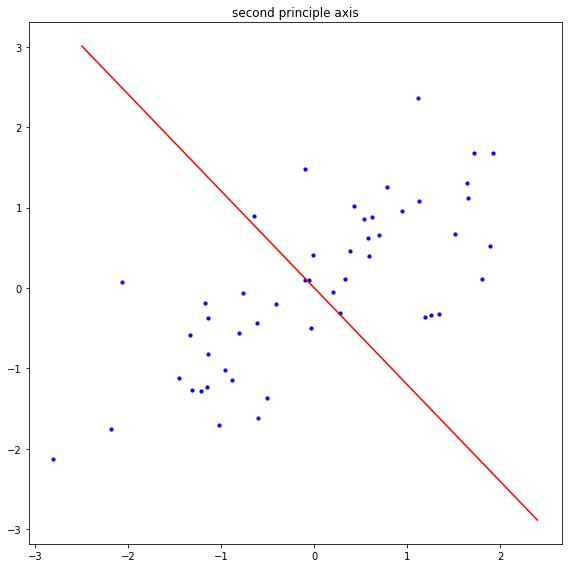

In [228]:
t = U[1][0] / U[0][0]
plt.figure(figsize=(8,8))
plt.title('second principle axis')
x = np.arange(-2.5,2.5,0.1)
f = np.zeros(len(x))
for i in range(len(x)):
    f[i]=t * x[i]
    print(f[i])
plt.plot(x, f, '-', color = 'red')
plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.tight_layout()
plt.show()

## compute the projection of point onto the line

In [229]:
def compute_projection_onto_line(feature, vector):
    projection = np.zeros((feature.shape[0], 2))
    
    
    for i in range(feature.shape[0]):
        x = feature[i][0] * vector[0] + feature[i][1] * vector[1]
        y = vector[0]**2 +vector[1]**2
        projection[i] = vector * (x / y)
    return projection

## projcet to the first principal axis

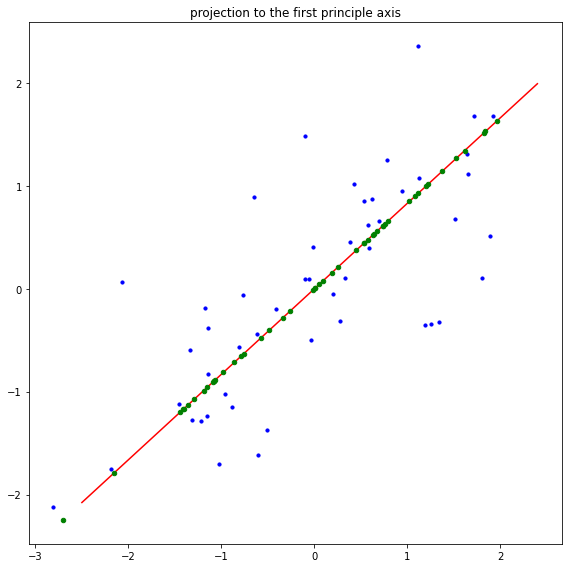

In [230]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
vector = np.zeros(2)
vector[0] = U[0][1]*S[1][1]
vector[1] = U[1][1]*S[1][1]
projection = compute_projection_onto_line(z_scoring_data, vector)
projectionT= projection.T
plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.scatter(projectionT[0],projectionT[1], s = 20, c = 'g',zorder=3)
plt.plot(x, f1, '-', color = 'red')
plt.tight_layout()
plt.show()

## projcet to the second principal axis

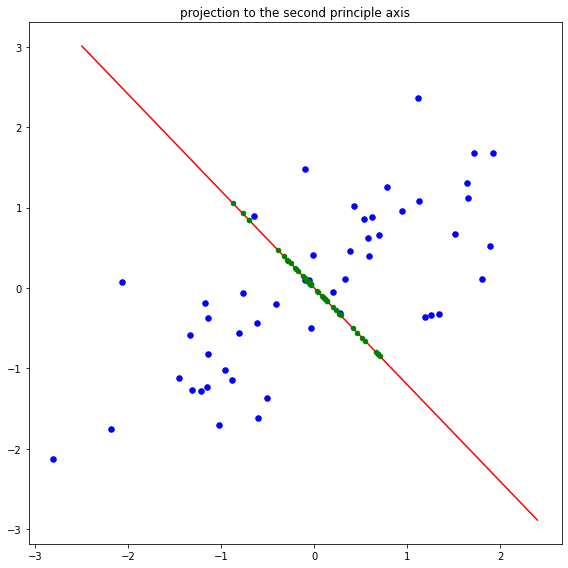

In [231]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
vector = np.zeros(2)
vector[0] = U[0][0]
vector[1] = U[1][0]
projection = compute_projection_onto_line(z_scoring_data, vector)
projectionT= projection.T
plt.plot(x, f, '-', color = 'red')
plt.scatter(temp[0],temp[1], s = 30, c = 'b')
plt.scatter(projectionT[0],projectionT[1], s = 20, c = 'g',zorder=3)
plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

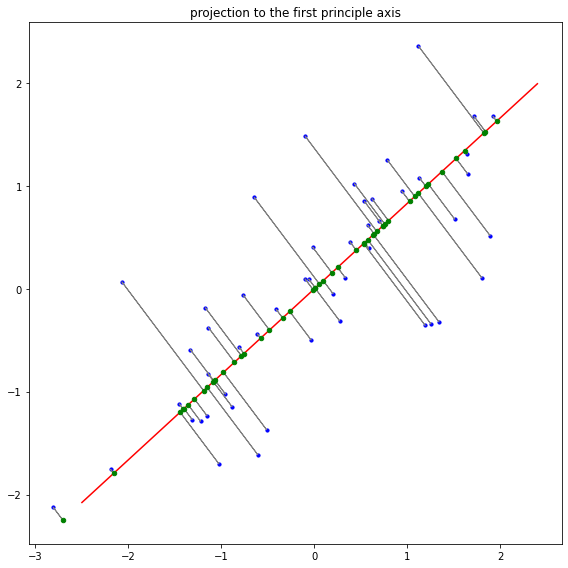

In [234]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
vector = np.zeros(2)
vector[0] = U[0][1]*S[1][1]
vector[1] = U[1][1]*S[1][1]
projection = compute_projection_onto_line(z_scoring_data, vector)
for i in range(feature.shape[0]):
    prox = projection[i][0] - z_scoring_data[i][0]
    proy = projection[i][1] - z_scoring_data[i][1]
    plt.arrow(z_scoring_data[i][0],z_scoring_data[i][1],prox,proy, head_width=0.0001,color = 'gray')
    
projectionT= projection.T
plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.scatter(projectionT[0],projectionT[1], s = 20, c = 'g',zorder=3)
plt.plot(x, f1, '-', color = 'red')
plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

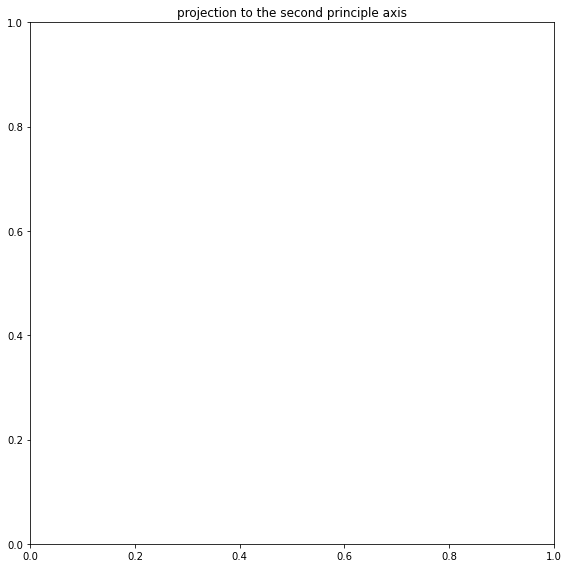

In [233]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

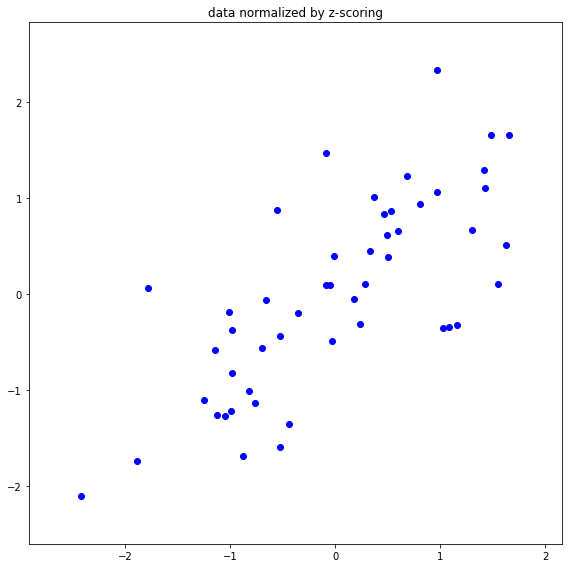

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

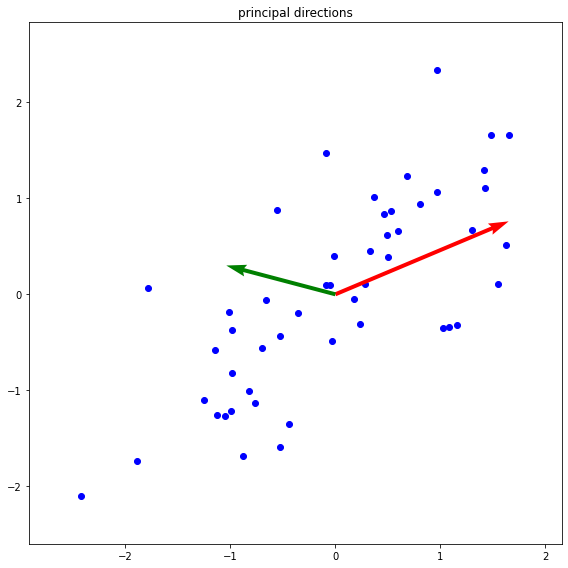

***

### 3. plot the first principal axis in red on the normalized data in blue

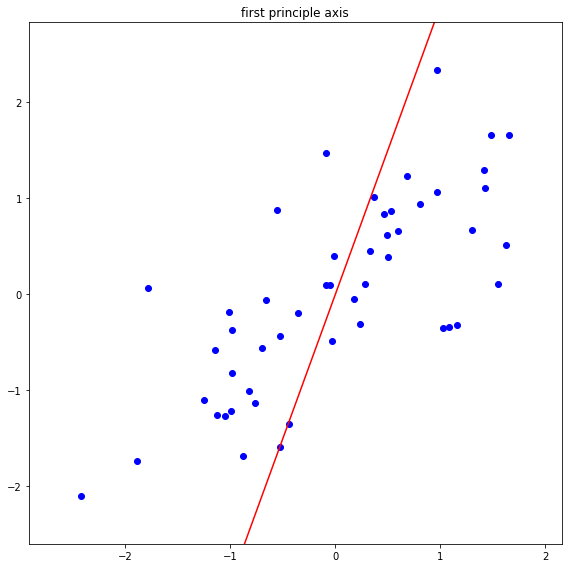

***

### 4. plot the second principal axis in red on the normalized data in blue

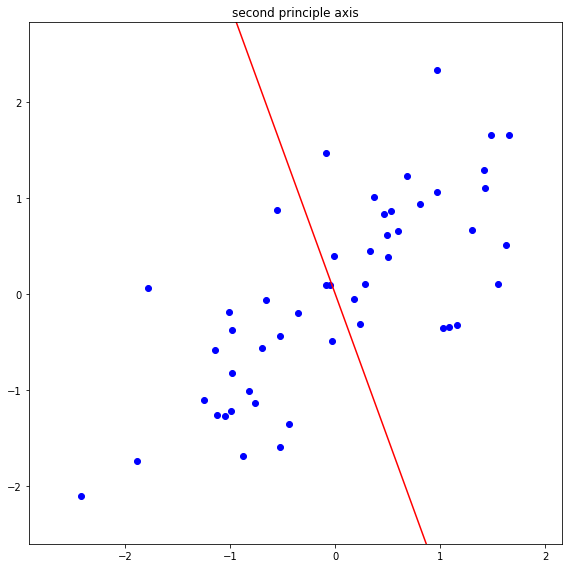

***

### 5. plot the projection of data in green onto the first principal axis in red

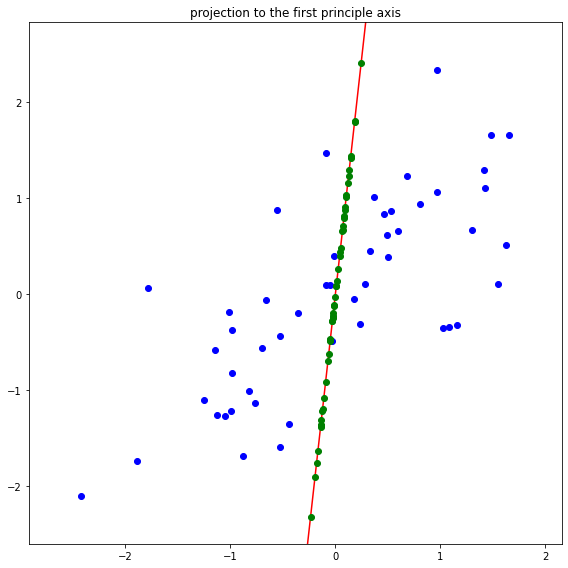

***

### 6. plot the projection of data in green onto the second principal axis in red

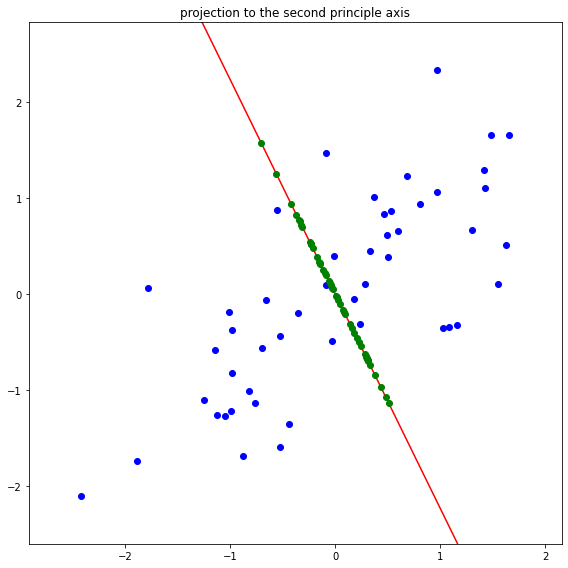

***

### 7. plot the projection line in grey onto the first principal axis

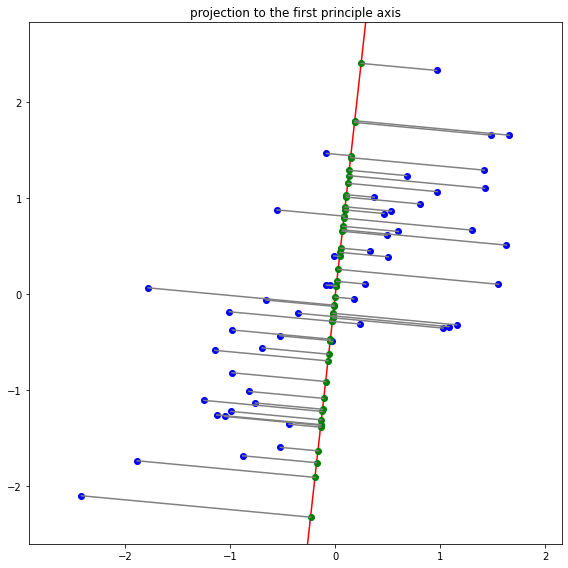

***

### 8. plot the projection line in grey onto the second principal axis

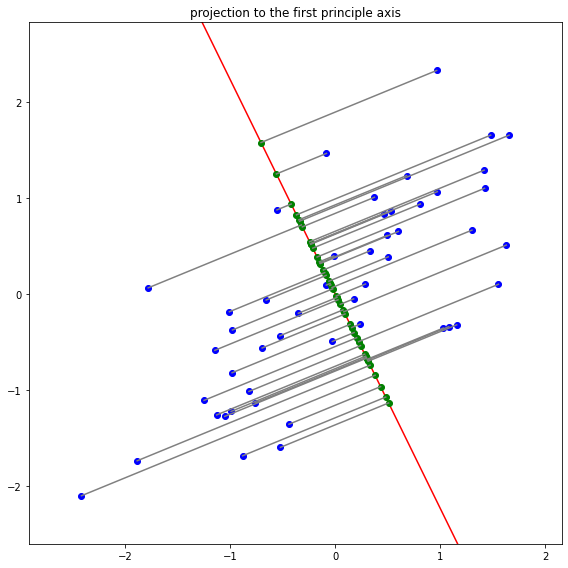

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***